# Import 

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load data

In [166]:
data = pd.read_csv('SalesOfMedicalDevices.csv')

In [3]:
data.head()

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,1,2009,1,2,3,-1
1,1,2010,1,1,3,-1
2,1,2011,1,2,0,1
3,1,2012,3,2,0,1
4,1,2013,3,3,3,1


In [160]:
# Check for any missing values in the DataFrame
missing_values = data.isnull().sum().sum()

if missing_values == 0:
    print("There are no missing values in the DataFrame.")
else:
    print(f"There are {missing_values} missing values in the DataFrame.")

There are no missing values in the DataFrame.


# Visuals to understand data and trends now grouped by year

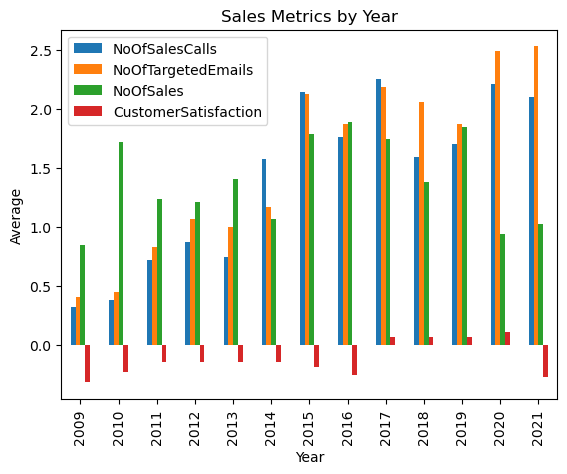

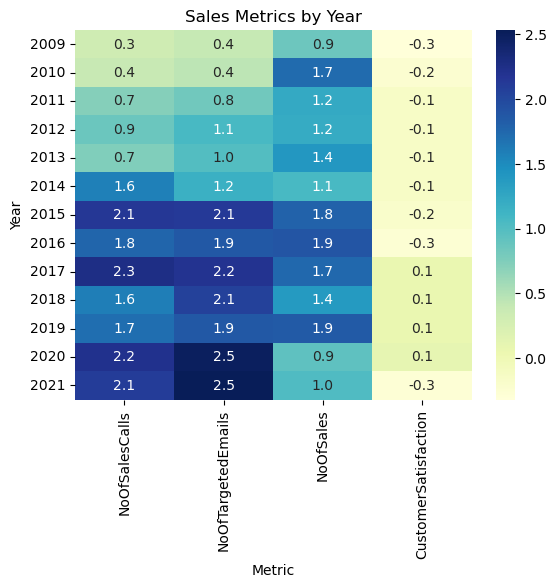

In [4]:
# Drop the 'customer' column from the data
data_without_customer = data.drop('Customer', axis=1)

# Group the data by year and calculate the average of each remaining column
grouped = data_without_customer.groupby('year').mean()

# Plot the results as a bar chart
grouped.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Sales Metrics by Year')
plt.show()

# Create a heatmap
sns.heatmap(grouped, annot=True, fmt=".1f", cmap="YlGnBu")

# Set the axis labels and title
plt.xlabel('Metric')
plt.ylabel('Year')
plt.title('Sales Metrics by Year')

# Show the plot
plt.show()


# Start of KNN analyis encoding and standardizing

In [168]:
#create new column id for each customer year
data['Customer_Id_Year'] = data['Customer'].astype(str) + '.' + data['year'].astype(str)
data.head()

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction,Customer_Id_Year
0,1,2009,1,2,3,-1,1.2009
1,1,2010,1,1,3,-1,1.2010
2,1,2011,1,2,0,1,1.2011
3,1,2012,3,2,0,1,1.2012
4,1,2013,3,3,3,1,1.2013


In [169]:
#create sales column to be yes sale or no sale
data['Sale_Status'] = np.where(data['NoOfSales'] > 0, 'Yes Sale', 'No Sale')
data.head()

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction,Customer_Id_Year,Sale_Status
0,1,2009,1,2,3,-1,1.2009,Yes Sale
1,1,2010,1,1,3,-1,1.2010,Yes Sale
2,1,2011,1,2,0,1,1.2011,No Sale
3,1,2012,3,2,0,1,1.2012,No Sale
4,1,2013,3,3,3,1,1.2013,Yes Sale


In [170]:
data['NoOfSales_YN'] = np.where(data['NoOfSales'] > 1, 1, 0)
data.head()

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction,Customer_Id_Year,Sale_Status,NoOfSales_YN
0,1,2009,1,2,3,-1,1.2009,Yes Sale,1
1,1,2010,1,1,3,-1,1.2010,Yes Sale,1
2,1,2011,1,2,0,1,1.2011,No Sale,0
3,1,2012,3,2,0,1,1.2012,No Sale,0
4,1,2013,3,3,3,1,1.2013,Yes Sale,1


In [171]:
#create sales column to be satisfied or not. Assume 0 is neutral and that is good
data['CustomerSatisfactionLevel'] = np.where(data['CustomerSatisfaction'] > 0, 'Satisfied', 'Not Satisfied')
data.head()

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction,Customer_Id_Year,Sale_Status,NoOfSales_YN,CustomerSatisfactionLevel
0,1,2009,1,2,3,-1,1.2009,Yes Sale,1,Not Satisfied
1,1,2010,1,1,3,-1,1.2010,Yes Sale,1,Not Satisfied
2,1,2011,1,2,0,1,1.2011,No Sale,0,Satisfied
3,1,2012,3,2,0,1,1.2012,No Sale,0,Satisfied
4,1,2013,3,3,3,1,1.2013,Yes Sale,1,Satisfied


In [172]:
#not satisfied is 0, satisfied is 1
data['CustomerSatisfaction_YN'] = np.where(data['CustomerSatisfaction'] > 0, 1, 0)
data.head()

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction,Customer_Id_Year,Sale_Status,NoOfSales_YN,CustomerSatisfactionLevel,CustomerSatisfaction_YN
0,1,2009,1,2,3,-1,1.2009,Yes Sale,1,Not Satisfied,0
1,1,2010,1,1,3,-1,1.2010,Yes Sale,1,Not Satisfied,0
2,1,2011,1,2,0,1,1.2011,No Sale,0,Satisfied,1
3,1,2012,3,2,0,1,1.2012,No Sale,0,Satisfied,1
4,1,2013,3,3,3,1,1.2013,Yes Sale,1,Satisfied,1


# Relationship by Sale made 

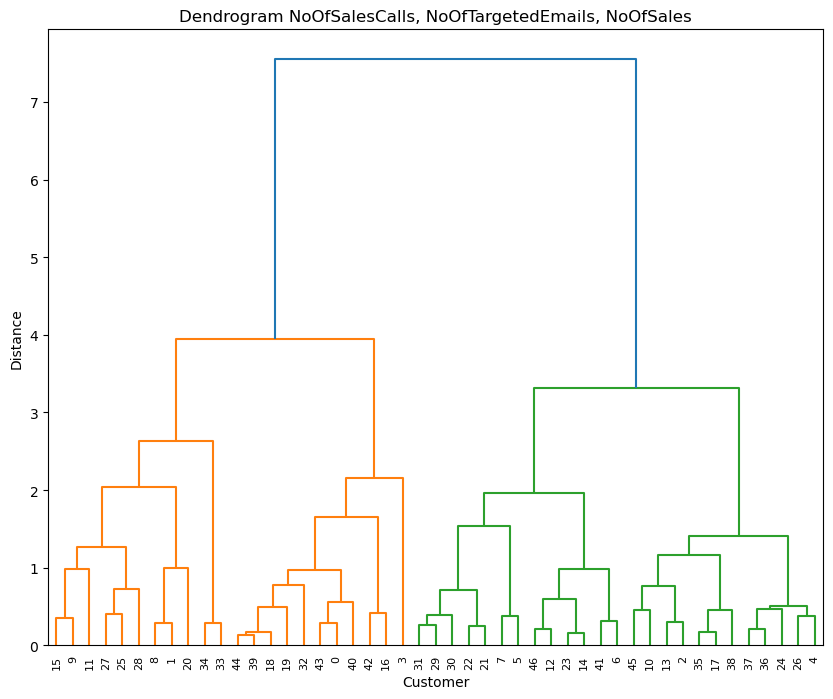

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Define feature variables
X = data.groupby('Customer')[['NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales']].mean()

# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram NoOfSalesCalls, NoOfTargetedEmails, NoOfSales')
plt.xlabel('Customer')
plt.ylabel('Distance')
plt.show()

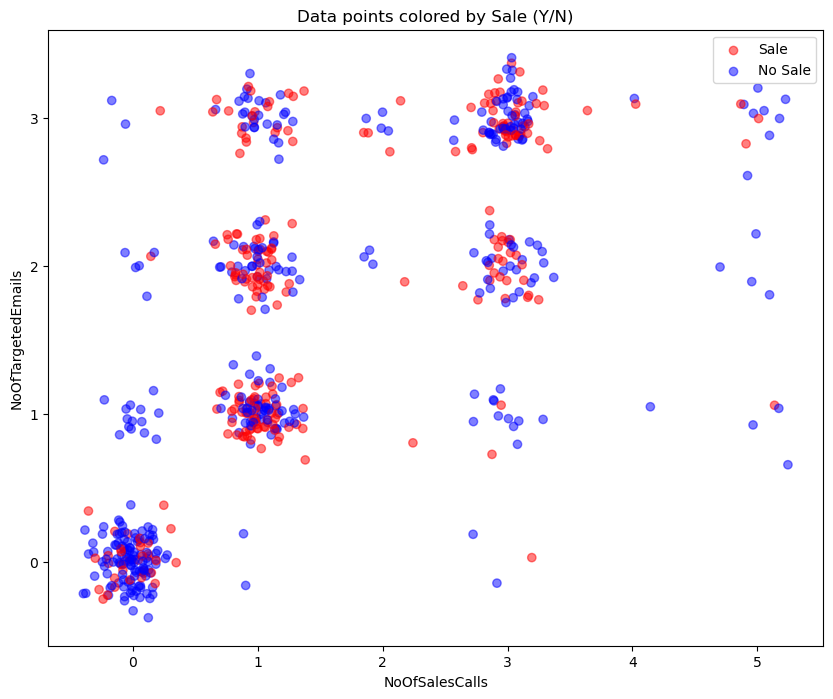

Total sales:  253
Total no sales:  358


In [189]:
# Add random noise to the data
data['NoOfSalesCalls'] = data['NoOfSalesCalls'] + np.random.normal(scale=0.1, size=len(data))
data['NoOfTargetedEmails'] = data['NoOfTargetedEmails'] + np.random.normal(scale=0.1, size=len(data))

# Convert Sale_Status to color codes
colors = np.where(data['NoOfSales_YN'] == 1, 'red', np.where(data['NoOfSales_YN'] == 0, 'blue', 'gray'))


# Plot the data points colored by Sale_Status
fig = plt.figure(figsize=(10, 8)) 
plt.scatter(data['NoOfSalesCalls'], data['NoOfTargetedEmails'], c=colors, alpha=0.5, label=['No Sale', 'Yes Sale'])
plt.xlabel('NoOfSalesCalls')
plt.ylabel('NoOfTargetedEmails')
plt.xticks(np.arange(-1, 6, 1)) 
plt.yticks(np.arange(-1, 4, 1)) 
plt.title('Data points colored by Sale (Y/N)')
plt.legend(handles=[plt.scatter([], [], c='red', alpha=0.5), plt.scatter([], [], c='blue', alpha=0.5)], 
           labels=['Sale', 'No Sale'])
plt.show()

Sales_count = data['NoOfSales_YN'].value_counts()[1]
no_Sales_count = data['NoOfSales_YN'].value_counts()[0]

print("Total sales: ", Sales_count)
print("Total no sales: ", no_Sales_count)

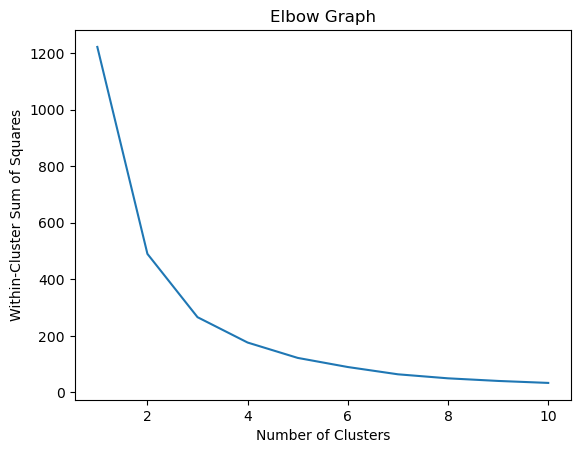

In [190]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['NoOfSalesCalls', 'NoOfTargetedEmails']])

# Define range of clusters to test
num_clusters = range(1, 11)

# Initialize list to store within-cluster sum of squares for each number of clusters
wcss = []

# Iterate over range of clusters and calculate the within-cluster sum of squares
for n in num_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(num_clusters, wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


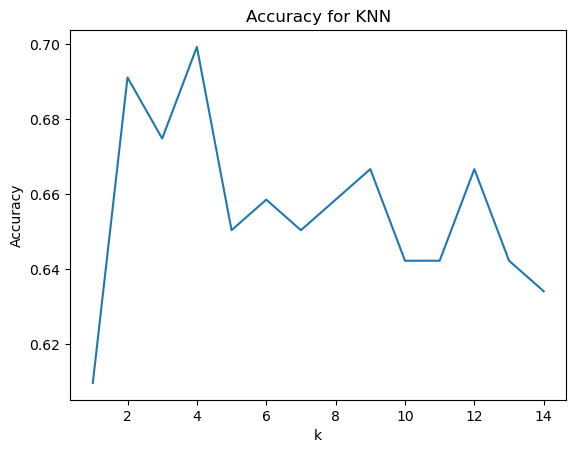

In [191]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['NoOfSalesCalls', 'NoOfTargetedEmails']])
y = data['NoOfSales_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['NoOfSalesCalls', 'NoOfTargetedEmails']], data['NoOfSales_YN'], test_size=0.2, random_state=42)

# Calculate accuracy for different values of k
k_values = range(1, 15)
accuracy_values = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the accuracy vs. k
plt.plot(k_values, accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for KNN')
plt.show()


In [195]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['NoOfSalesCalls', 'NoOfTargetedEmails']])
y = data['NoOfSales_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['NoOfSalesCalls', 'NoOfTargetedEmails']], data['NoOfSales_YN'], test_size=0.2, random_state=42)

# Create a KNN model and fit the training data
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6991869918699187


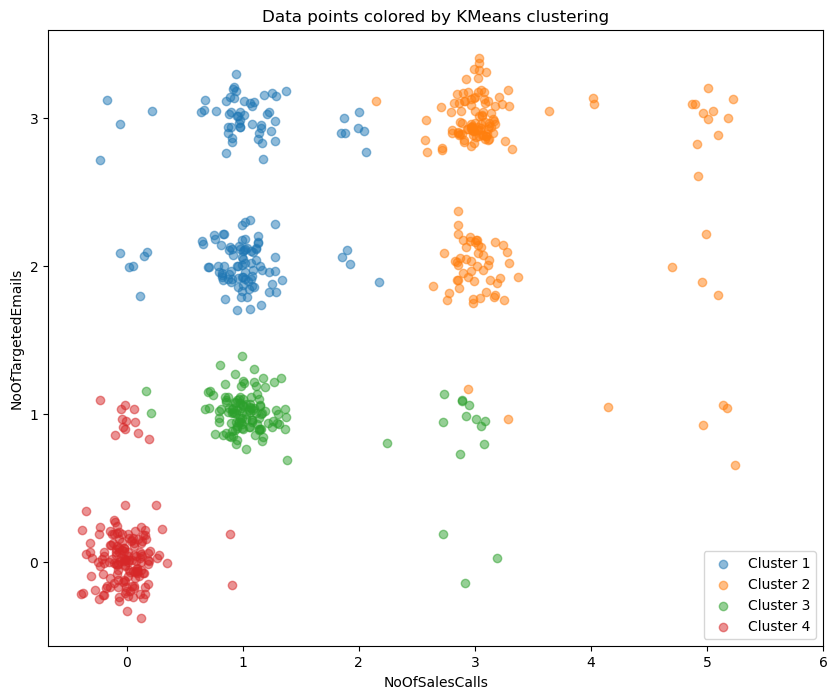

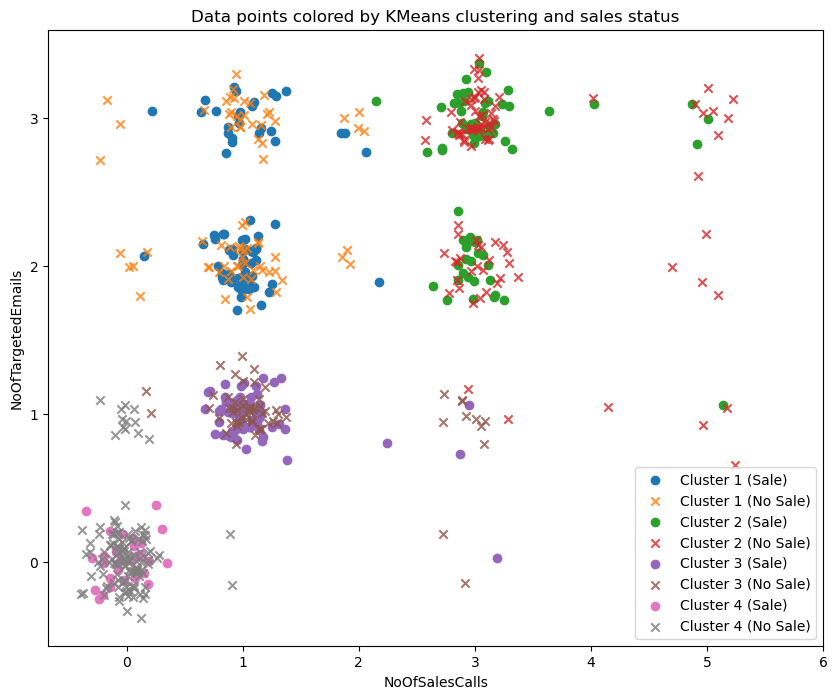

Cluster 1: 50.67% sales, 49.33% no sales, mean sales calls: 1.01, mean targeted emails: 2.39
Cluster 2: 44.44% sales, 55.56% no sales, mean sales calls: 3.24, mean targeted emails: 2.61
Cluster 3: 51.91% sales, 48.09% no sales, mean sales calls: 1.22, mean targeted emails: 0.99
Cluster 4: 20.75% sales, 79.25% no sales, mean sales calls: -0.01, mean targeted emails: 0.08


In [196]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['NoOfSalesCalls', 'NoOfTargetedEmails']])

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4,n_init=10, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Get unique labels
unique_labels = np.unique(labels)

# Plot the data points colored by their cluster label
fig = plt.figure(figsize=(10, 8))
for i in unique_labels:
    plt.scatter(data.loc[labels == i, 'NoOfSalesCalls'], data.loc[labels == i, 'NoOfTargetedEmails'], alpha=0.5, label=f'Cluster {i+1}')
plt.xlabel('NoOfSalesCalls')
plt.ylabel('NoOfTargetedEmails')
plt.xticks(np.arange(0, 7, 1)) 
plt.yticks(np.arange(0, 4, 1))
plt.title('Data points colored by KMeans clustering')
plt.legend()
plt.show()

# Create a new column to indicate whether a sale occurred or not
data['Sale'] = np.where(data['NoOfSales_YN'] == 1, 'Yes', 'No')

# Plot the data points colored by their cluster label and sales status
fig = plt.figure(figsize=(10, 8))
for i in unique_labels:
    plt.scatter(data.loc[(labels == i) & (data['Sale'] == 'Yes'), 'NoOfSalesCalls'], data.loc[(labels == i) & (data['Sale'] == 'Yes'), 'NoOfTargetedEmails'], alpha=1, label=f'Cluster {i+1} (Sale)')
    plt.scatter(data.loc[(labels == i) & (data['Sale'] == 'No'), 'NoOfSalesCalls'], data.loc[(labels == i) & (data['Sale'] == 'No'), 'NoOfTargetedEmails'], alpha=0.8, label=f'Cluster {i+1} (No Sale)', marker='x')
plt.xlabel('NoOfSalesCalls')
plt.ylabel('NoOfTargetedEmails')
plt.xticks(np.arange(0, 7, 1)) 
plt.yticks(np.arange(0, 4, 1))
plt.title('Data points colored by KMeans clustering and sales status')
plt.legend()
plt.show()

# Count the number of occurrences of each cluster and sale status combination
counts = data.groupby(['Sale', labels])['NoOfSales_YN'].count()

# Calculate the mean number of sales calls and emails for each cluster
data['Cluster'] = kmeans.labels_
cluster_means = data.groupby('Cluster').mean(numeric_only=True)[['NoOfSalesCalls', 'NoOfTargetedEmails']]


# Print the counts, percentage of sales, and mean number of sales calls and emails for each cluster
for i in unique_labels:
    sale_count = counts['Yes'][i]
    no_sale_count = counts['No'][i]
    total_count = sale_count + no_sale_count
    sale_percentage_yes = sale_count / total_count * 100
    sale_percentage_no = no_sale_count / total_count * 100
    mean_calls = cluster_means.loc[i, 'NoOfSalesCalls']
    mean_emails = cluster_means.loc[i, 'NoOfTargetedEmails']
    print(f'Cluster {i+1}: {sale_percentage_yes:.2f}% sales, {sale_percentage_no:.2f}% no sales, '
          f'mean sales calls: {mean_calls:.2f}, mean targeted emails: {mean_emails:.2f}')



/Users/johnthormeiii/opt/anaconda3/envs/myev/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


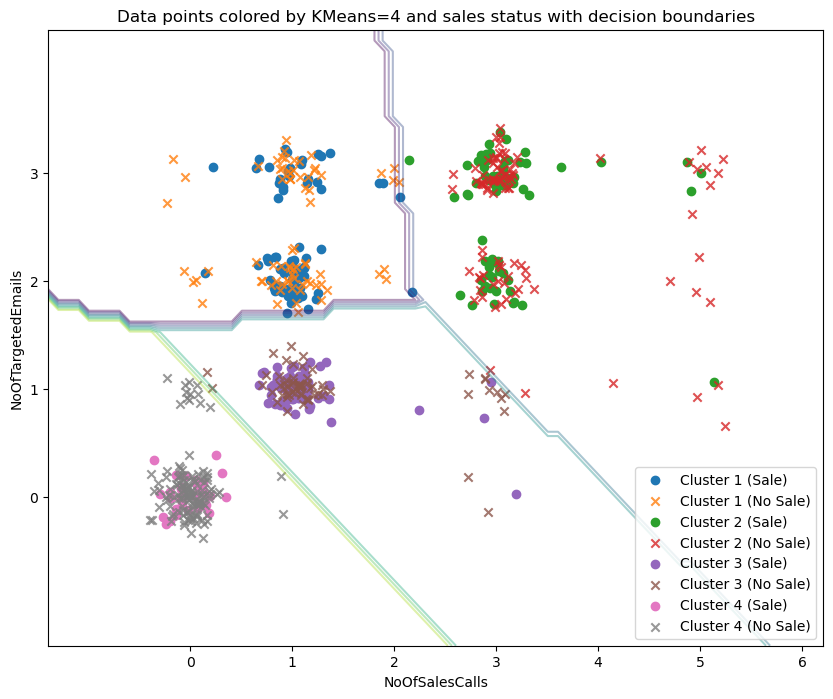

In [211]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['NoOfSalesCalls', 'NoOfTargetedEmails']])

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4,n_init=10, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Get unique labels
unique_labels = np.unique(labels)

# Create a meshgrid to plot the decision boundaries
x_min, x_max = data['NoOfSalesCalls'].min() - 1, data['NoOfSalesCalls'].max() + 1
y_min, y_max = data['NoOfTargetedEmails'].min() - 1, data['NoOfTargetedEmails'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = kmeans.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the data points colored by their cluster label and sales status
fig = plt.figure(figsize=(10, 8))
for i in unique_labels:
    plt.scatter(data.loc[(labels == i) & (data['Sale'] == 'Yes'), 'NoOfSalesCalls'], data.loc[(labels == i) & (data['Sale'] == 'Yes'), 'NoOfTargetedEmails'], alpha=1, label=f'Cluster {i+1} (Sale)')
    plt.scatter(data.loc[(labels == i) & (data['Sale'] == 'No'), 'NoOfSalesCalls'], data.loc[(labels == i) & (data['Sale'] == 'No'), 'NoOfTargetedEmails'], alpha=0.8, label=f'Cluster {i+1} (No Sale)', marker='x')


# Plot the decision boundaries
plt.contour(xx, yy, Z, alpha=0.4)

plt.xlabel('NoOfSalesCalls')
plt.ylabel('NoOfTargetedEmails')
plt.xticks(np.arange(0, 7, 1)) 
plt.yticks(np.arange(0, 4, 1))
plt.title('Data points colored by KMeans=4 and sales status with decision boundaries')
plt.legend()
plt.show()


Based on the analysis, we can see that there are different patterns of customer behavior in each cluster. In Cluster 1, the sales percentage is low and the mean values for sales calls and targeted emails are also low. This indicates that the customers in this cluster may not be very responsive to sales calls and emails. In Cluster 2, the sales percentage is higher and the mean values for sales calls and targeted emails are also higher than in Cluster 1. This suggests that customers in this cluster are more receptive to sales calls and targeted emails. In Cluster 3, the sales percentage is similar to Cluster 2, but the mean values for sales calls and targeted emails are even higher, indicating that customers in this cluster may require more frequent communication. In Cluster 4, the sales percentage is also high, but the mean values for sales calls and targeted emails are relatively low, suggesting that customers in this cluster may be more responsive to other forms of communication or marketing strategies. Overall, the analysis highlights the importance of tailoring sales and marketing strategies based on the behavior patterns of different customer clusters. 

For example, if the new data point is assigned to Cluster 2, which has a 22% sales percentage, you might predict that the customer is less likely to make a purchase compared to a customer assigned to Cluster 3, which has a higher sales percentage of 43.96%.

For Cluster 1, the sales percentage is low, and the mean values for sales calls and targeted emails are also low. This suggests that customers in this cluster may not be very responsive to sales calls and emails.

For Cluster 2, the sales percentage is higher, and the mean values for sales calls and targeted emails are also higher than in Cluster 1. This suggests that customers in this cluster are more receptive to sales calls and targeted emails.

For Cluster 3, the sales percentage is similar to Cluster 2, but the mean values for sales calls and targeted emails are even higher, indicating that customers in this cluster may require more frequent communication.

For Cluster 4, the sales percentage is also high, but the mean values for sales calls and targeted emails are relatively low, suggesting that customers in this cluster may be more responsive to other forms of communication or marketing strategies.

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define feature and target variables
x = data[['NoOfSalesCalls', 'NoOfTargetedEmails']]
Y = data['NoOfSales_YN']

# Split data into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Fit the model to the training data
model.fit(x_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.5772357723577236


Accuracy: 0.5772357723577236


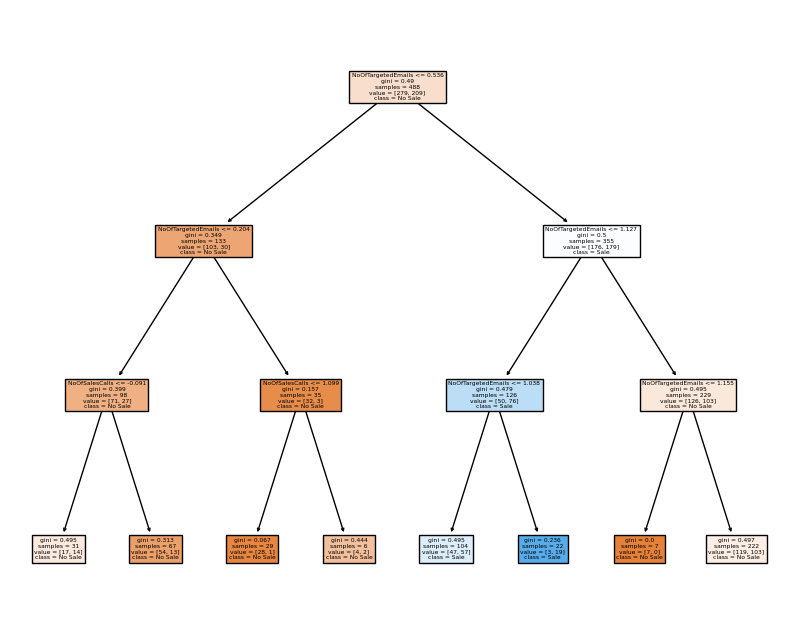

In [149]:
# Split the data into training and test sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Train the decision tree classifier with max depth of 3
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(x_train, Y_train)

# Make predictions on the test set
y_pred = dt.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt, feature_names=['NoOfTargetedEmails','NoOfSalesCalls'], class_names=['No Sale', 'Sale'], filled=True)
plt.show()


# Relationship by Satisfaction

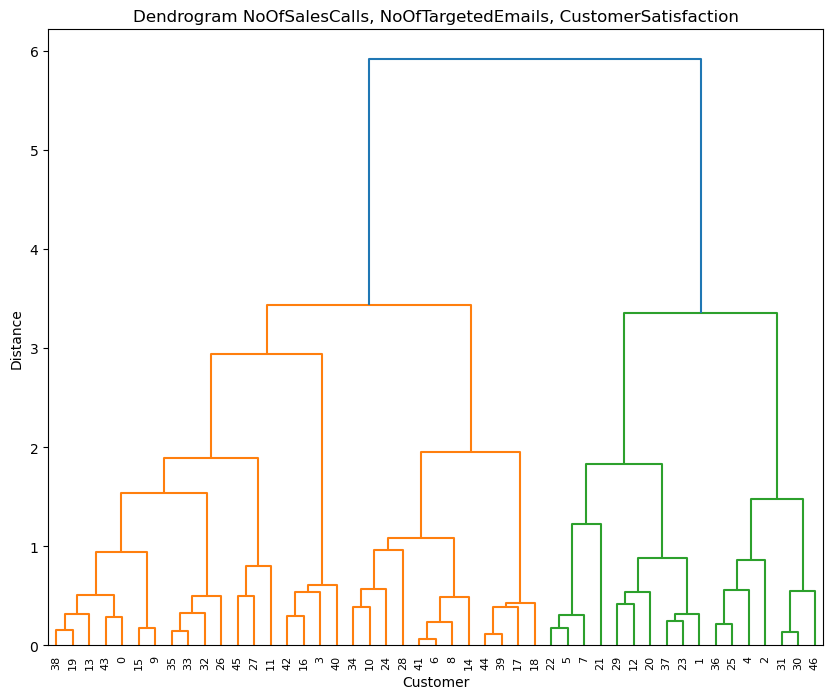

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Define feature variables
X = data.groupby('Customer')[['NoOfSalesCalls', 'NoOfTargetedEmails', 'CustomerSatisfaction']].mean()

# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram NoOfSalesCalls, NoOfTargetedEmails, CustomerSatisfaction')
plt.xlabel('Customer')
plt.ylabel('Distance')
plt.show()

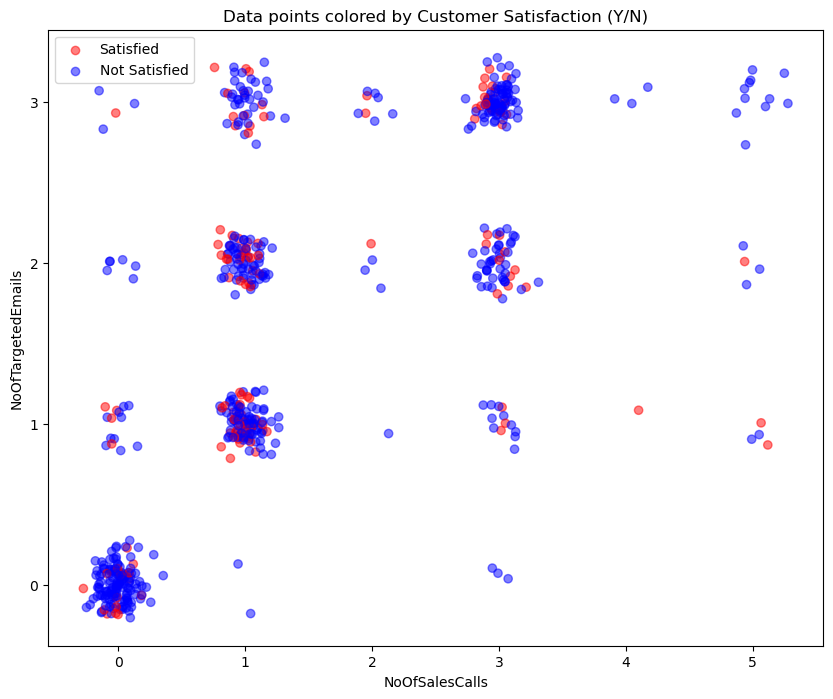

Total satisfied:  134
Total not satisfied:  477


In [178]:
# Add random noise to the data
data['NoOfSalesCalls'] = data['NoOfSalesCalls'] + np.random.normal(scale=0.1, size=len(data))
data['NoOfTargetedEmails'] = data['NoOfTargetedEmails'] + np.random.normal(scale=0.1, size=len(data))

# Convert Sale_Status to color codes
colors = np.where(data['CustomerSatisfaction_YN'] == 1, 'red', np.where(data['CustomerSatisfaction_YN'] == 0, 'blue', 'gray'))


# Plot the data points colored by Sale_Status
fig = plt.figure(figsize=(10, 8)) 
plt.scatter(data['NoOfSalesCalls'], data['NoOfTargetedEmails'], c=colors, alpha=0.5, label=['No Sale', 'Yes Sale'])
plt.xlabel('NoOfSalesCalls')
plt.ylabel('NoOfTargetedEmails')
plt.xticks(np.arange(-1, 6, 1)) 
plt.yticks(np.arange(-1, 4, 1)) 
plt.title('Data points colored by Customer Satisfaction (Y/N)')
plt.legend(handles=[plt.scatter([], [], c='red', alpha=0.5), plt.scatter([], [], c='blue', alpha=0.5)], 
           labels=['Satisfied', 'Not Satisfied'])
plt.show()

satisfied_count = data['CustomerSatisfaction_YN'].value_counts()[1]
not_satisfied_count = data['CustomerSatisfaction_YN'].value_counts()[0]

print("Total satisfied: ", satisfied_count)
print("Total not satisfied: ", not_satisfied_count)

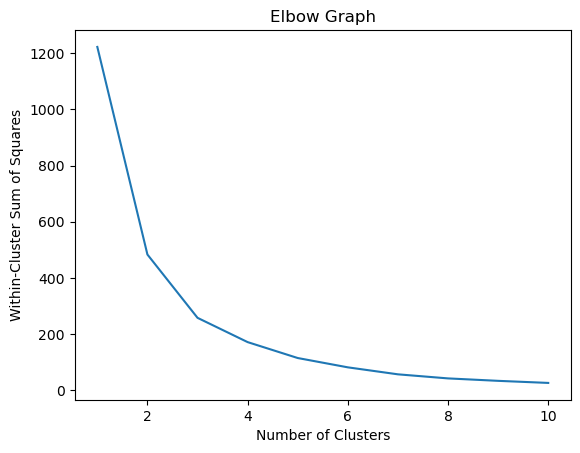

In [179]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['NoOfSalesCalls', 'NoOfTargetedEmails']])

# Define range of clusters to test
num_clusters = range(1, 11)

# Initialize list to store within-cluster sum of squares for each number of clusters
wcss = []

# Iterate over range of clusters and calculate the within-cluster sum of squares
for n in num_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(num_clusters, wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

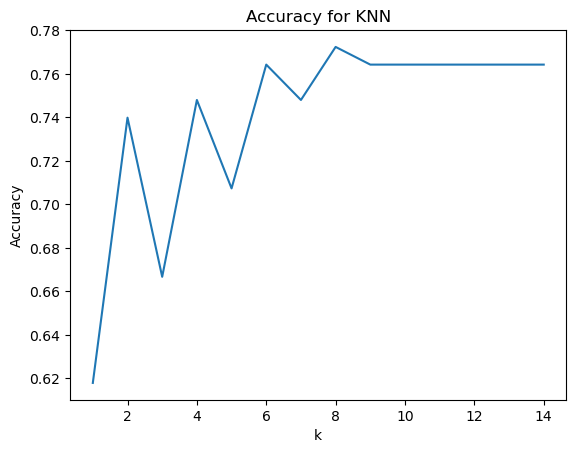

In [180]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['NoOfSalesCalls', 'NoOfTargetedEmails']])
y = data['CustomerSatisfaction_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['NoOfSalesCalls', 'NoOfTargetedEmails']], data['CustomerSatisfaction_YN'], test_size=0.2, random_state=42)

# Calculate accuracy for different values of k
k_values = range(1, 15)
accuracy_values = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the accuracy vs. k
plt.plot(k_values, accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for KNN')
plt.show()

In [202]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['NoOfSalesCalls', 'NoOfTargetedEmails']])
y = data['CustomerSatisfaction_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['NoOfSalesCalls', 'NoOfTargetedEmails']], data['CustomerSatisfaction_YN'], test_size=0.2, random_state=42)

# Create a KNN model and fit the training data
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7642276422764228


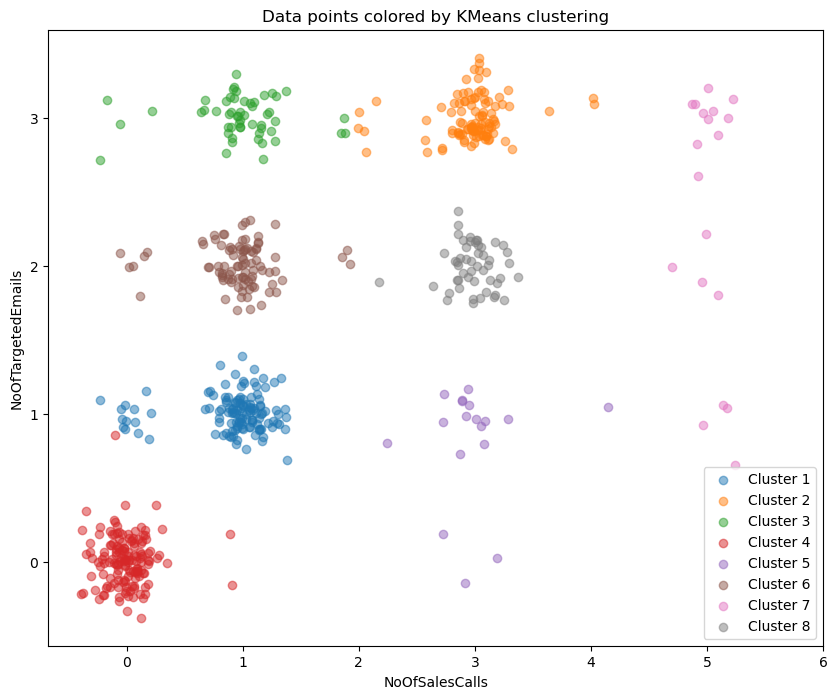

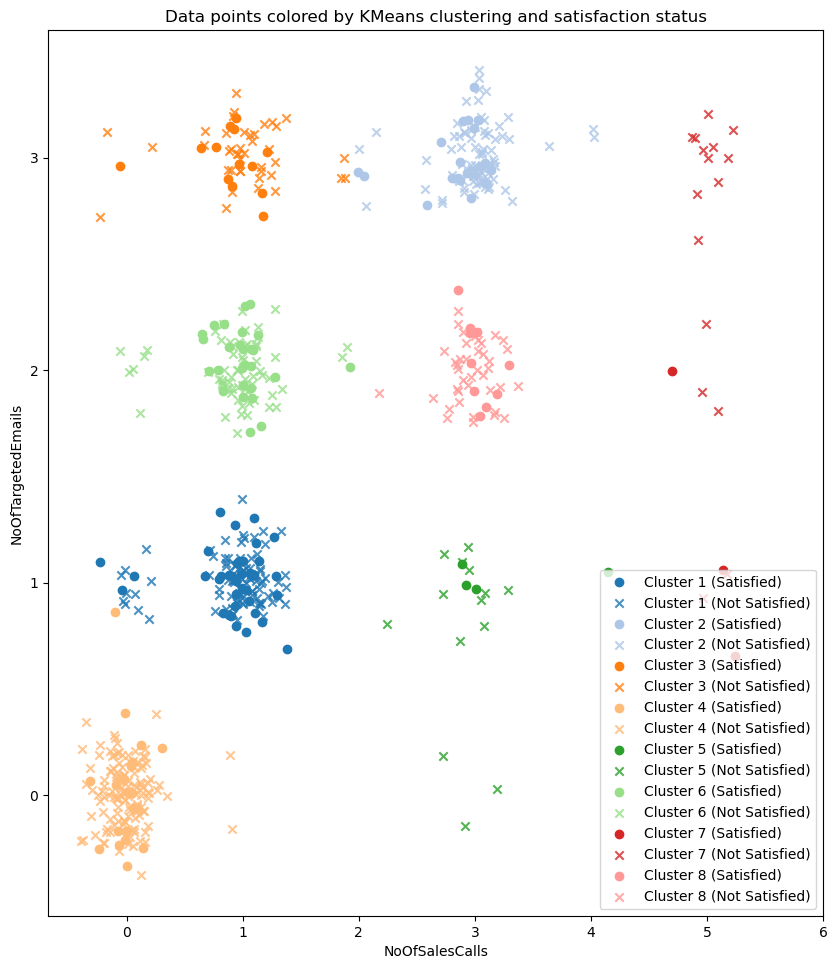

Cluster 1: 29.13% satisfied, 70.87% not satisfied mean sales calls: 0.92, mean targeted emails: 1.01
Cluster 2: 21.36% satisfied, 78.64% not satisfied mean sales calls: 2.98, mean targeted emails: 3.00
Cluster 3: 24.07% satisfied, 75.93% not satisfied mean sales calls: 0.98, mean targeted emails: 3.01
Cluster 4: 12.16% satisfied, 87.84% not satisfied mean sales calls: -0.01, mean targeted emails: 0.01
Cluster 5: 22.22% satisfied, 77.78% not satisfied mean sales calls: 2.98, mean targeted emails: 0.82
Cluster 6: 29.67% satisfied, 70.33% not satisfied mean sales calls: 0.96, mean targeted emails: 2.01
Cluster 7: 15.79% satisfied, 84.21% not satisfied mean sales calls: 5.02, mean targeted emails: 2.34
Cluster 8: 19.61% satisfied, 80.39% not satisfied mean sales calls: 2.98, mean targeted emails: 2.00


In [203]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['NoOfSalesCalls', 'NoOfTargetedEmails']])

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Get unique labels
unique_labels = np.unique(labels)
# Generate a list of distinct colors for up to 20 clusters using tab20 color map
colors = plt.cm.tab20(np.linspace(0, 1, 20))

# Plot the data points colored by their cluster label
fig = plt.figure(figsize=(10, 8))
for i in unique_labels:
    plt.scatter(data.loc[labels == i, 'NoOfSalesCalls'], data.loc[labels == i, 'NoOfTargetedEmails'], alpha=0.5, label=f'Cluster {i+1}')
plt.xlabel('NoOfSalesCalls')
plt.ylabel('NoOfTargetedEmails')
plt.xticks(np.arange(0, 7, 1)) 
plt.yticks(np.arange(0, 4, 1))
plt.title('Data points colored by KMeans clustering')
plt.legend()
plt.show()

# Create a new column to indicate whether the customer is satisfied or not
data['Satisfied'] = np.where(data['CustomerSatisfaction_YN'] == 1, 'Yes', 'No')

# Plot the data points colored by their cluster label and satisfaction status
fig = plt.figure(figsize=(10, 11.5))
for i in unique_labels:
    plt.scatter(data.loc[(labels == i) & (data['Satisfied'] == 'Yes'), 'NoOfSalesCalls'], data.loc[(labels == i) & (data['Satisfied'] == 'Yes'), 'NoOfTargetedEmails'], alpha=1, label=f'Cluster {i+1} (Satisfied)',color=colors[i])
    plt.scatter(data.loc[(labels == i) & (data['Satisfied'] == 'No'), 'NoOfSalesCalls'], data.loc[(labels == i) & (data['Satisfied'] == 'No'), 'NoOfTargetedEmails'], alpha=0.8, label=f'Cluster {i+1} (Not Satisfied)', marker='x',color=colors[i])
plt.xlabel('NoOfSalesCalls')
plt.ylabel('NoOfTargetedEmails')
plt.xticks(np.arange(0, 7, 1)) 
plt.yticks(np.arange(0, 4, 1))
plt.title('Data points colored by KMeans clustering and satisfaction status')
plt.legend()
plt.show()

# Count the number of occurrences of each cluster and satisfaction status combination
counts = data.groupby(['Satisfied', labels])['CustomerSatisfaction_YN'].count()

# Calculate the mean number of sales calls and emails for each cluster
data['Cluster'] = kmeans.labels_
cluster_means = data.groupby('Cluster').mean(numeric_only=True)[['NoOfSalesCalls', 'NoOfTargetedEmails']]

# Print the counts, percentage of satisfaction, and mean number of sales calls and emails for each cluster
for i in unique_labels:
    if i in counts['Yes'] and i in counts['No']:
        satisfied_count = counts['Yes'][i]
        not_satisfied_count = counts['No'][i]
        total_count = satisfied_count + not_satisfied_count
        satisfied_percentage = satisfied_count / total_count * 100
        not_satisfied_percentage = not_satisfied_count / total_count * 100
        mean_calls = cluster_means.loc[i, 'NoOfSalesCalls']
        mean_emails = cluster_means.loc[i, 'NoOfTargetedEmails']
        print(f'Cluster {i+1}: {satisfied_percentage:.2f}% satisfied, {not_satisfied_percentage:.2f}% not satisfied '
              f'mean sales calls: {mean_calls:.2f}, mean targeted emails: {mean_emails:.2f}')
    else:
        print(f'Cluster {i+1} is not present in the data.')





/Users/johnthormeiii/opt/anaconda3/envs/myev/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


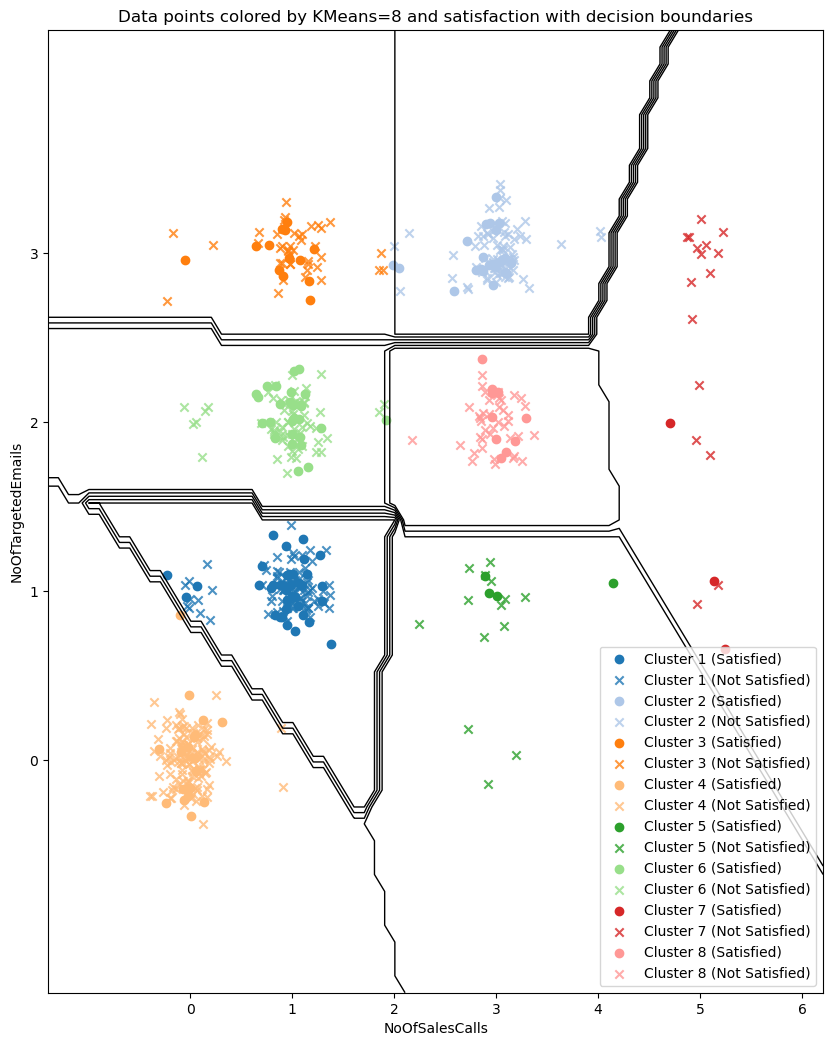

In [212]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['NoOfSalesCalls', 'NoOfTargetedEmails']])

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Get unique labels
unique_labels = np.unique(labels)

# Plot the data points colored by their cluster label
fig = plt.figure(figsize=(10, 12.5))
for i in unique_labels:
    plt.scatter(data.loc[(labels == i) & (data['Satisfied'] == 'Yes'), 'NoOfSalesCalls'], data.loc[(labels == i) & (data['Satisfied'] == 'Yes'), 'NoOfTargetedEmails'], alpha=1, label=f'Cluster {i+1} (Satisfied)',color=colors[i])
    plt.scatter(data.loc[(labels == i) & (data['Satisfied'] == 'No'), 'NoOfSalesCalls'], data.loc[(labels == i) & (data['Satisfied'] == 'No'), 'NoOfTargetedEmails'], alpha=0.8, label=f'Cluster {i+1} (Not Satisfied)', marker='x',color=colors[i])
plt.xlabel('NoOfSalesCalls')
plt.ylabel('NoOfTargetedEmails')
plt.xticks(np.arange(0, 7, 1)) 
plt.yticks(np.arange(0, 4, 1))
plt.title('Data points colored by KMeans=8 and satisfaction with decision boundaries')
plt.legend()

# Plot the decision boundary
x_min, x_max = data['NoOfSalesCalls'].min() - 1, data['NoOfSalesCalls'].max() + 1
y_min, y_max = data['NoOfTargetedEmails'].min() - 1, data['NoOfTargetedEmails'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = kmeans.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', linewidths=1)

plt.show()


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define feature and target variables
X = data[['NoOfSalesCalls', 'NoOfTargetedEmails']]
y = data['CustomerSatisfaction_YN']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)




Accuracy: 0.7723577235772358


Accuracy: 0.7723577235772358


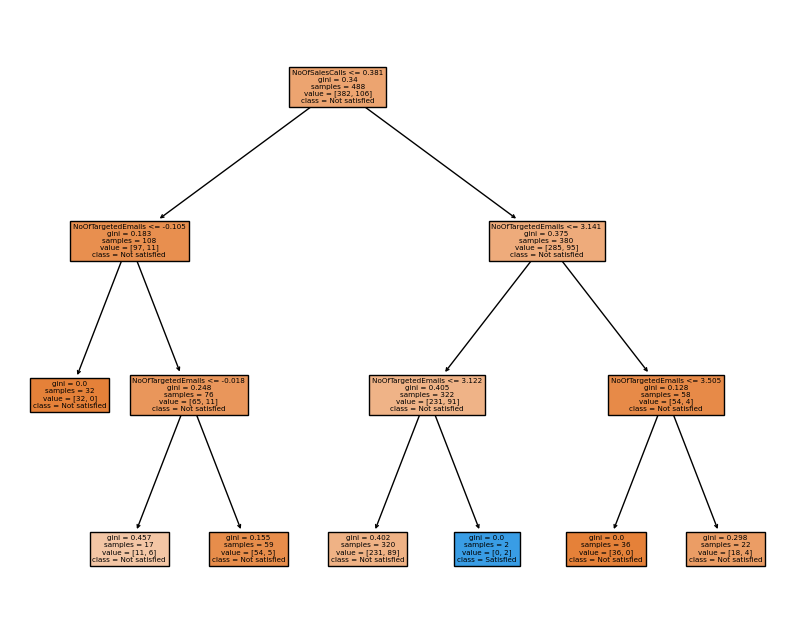

In [158]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier with max depth of 3
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt, feature_names=['NoOfTargetedEmails','NoOfSalesCalls'], class_names=['Not satisfied', 'Satisfied'], filled=True)
plt.show()


# Importance factors

In [35]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



# Define feature and target variables
X = data[['NoOfSalesCalls', 'NoOfTargetedEmails']]
y = data['CustomerSatisfaction_YN']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['Importance'])

# Print the feature importances
print(feature_importances)


                    Importance
NoOfSalesCalls        0.504986
NoOfTargetedEmails    0.495014


In [150]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define feature and target variables
x = data[['NoOfSalesCalls', 'NoOfTargetedEmails']]
Y = data['NoOfSales_YN']

# Split data into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Create a random forest classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(x_train, Y_train)

# Get feature importances
feature_importances = pd.DataFrame(rfc.feature_importances_, index=x_train.columns, columns=['Importance'])

# Print the feature importances
print(feature_importances)


                    Importance
NoOfSalesCalls        0.518093
NoOfTargetedEmails    0.481907


# Accuracy Results

In [213]:
# Create a dictionary with the data
data5 = {
    '': ['accuracy for Sales', 'accuracy for Satisfaction'],
    'KNN': ['70%', '76%'],
    'Decision tree': ['58%', '77%'],
    'Logistic regression': ['58%', '77%']
}

# Create a pandas dataframe from the dictionary
df1 = pd.DataFrame(data5)

# Set the index to the first column
df1.set_index('', inplace=True)

# Display the dataframe
print(df1)


                           KNN Decision tree Logistic regression
                                                                
accuracy for Sales         70%           58%                 58%
accuracy for Satisfaction  76%           77%                 77%
